# **Introduction**

### Air Quality Dataset Overview

- The dataset includes 9358 hourly readings from 5 metal oxide chemical sensors in an Air Quality Monitoring Device, deployed at road level in a polluted Italian city from March 2004 to February 2005. It provides ground truth concentrations for CO, Non-Methanic Hydrocarbons, Benzene, NOx, and NO2 from a certified analyzer. Sensor data show cross-sensitivities, concept drift, and sensor drift, potentially impacting concentration estimation, as detailed in De Vito et al., Sens. Act. B, Vol. 129, 2008. Missing values are tagged with -200 value.

### Feature Descriptions
------------------------------

- 0 Date (DD/MM/YYYY)
- 1 Time (HH.MM.SS)
- 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
- 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
- 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
- 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
- 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
- 7 True hourly averaged NOx concentration in ppb (reference analyzer)
- 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
- 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
- 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
- 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
- 12 Temperature in Â°C
- 13 Relative Humidity (%)
- 14 AH Absolute Humidity




# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', palette='viridis')

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer

from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV

# **Data Inspection and Imputing**

Okay, Since all the sufficient libraries are imported, let's discover some data insights and fix the issues

In [ ]:
df = pd.read_excel('/content/AirQualityUCI.xlsx')

In [ ]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [ ]:
df.shape

(9357, 15)

So we have 14 independent variables with 1 target column and 9357 instances

In [ ]:
df.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T      RH        AH  
9352      1728.50  21.850  29.250  0.756824  
9353      1269.00  24.325  23.725  0.711864  
9354      1092.00  26.900  18.350  0.640649  
9355       769.75  28.325  13.550  0.513866  
9356       816.00  28.500  13.125  0.502804

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

So we see that there are no null values, but from the data description we know that our missing values are -200s, lets do a little research to find out some null patterns


In [ ]:
missing_percentages = (df == -200).sum() / len(df) * 100
missing_percentages

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

Okay, we got a little pattern here, so as we can see there are lots of same null(-200) percentages, which means that some rows are just not filled, so we have to get rid of those rows, there is no point to fill them

In [ ]:
rows_with_many_missing = (df == -200).sum(axis=1) >=9
percentage_rows_many_missing = (rows_with_many_missing.sum() / len(df)) * 100

print(f"{percentage_rows_many_missing:.6f}% of rows have more than 9 missing values.")

3.911510% of rows have more than 9 missing values.


Now lets clean those rows that are missing values in the mentioned 9 columns

In [ ]:
df_cleaned_temp = df[~rows_with_many_missing]
missing_percentages_cleaned = (df_cleaned_temp == -200).sum() / len(df_cleaned_temp) * 100
missing_percentages_cleaned

Date              0.000000
Time              0.000000
CO(GT)           18.318318
PT08.S1(CO)       0.000000
NMHC(GT)         90.134579
C6H6(GT)          0.000000
PT08.S2(NMHC)     0.000000
NOx(GT)          17.739962
PT08.S3(NOx)      0.000000
NO2(GT)          17.773329
PT08.S4(NO2)      0.000000
PT08.S5(O3)       0.000000
T                 0.000000
RH                0.000000
AH                0.000000
dtype: float64

They are gone, now we have left only the normal -200 missing values, for which I am gonna use KNN imputer, because I think it is the best practice and would be suitable for our situation as well

In [ ]:
df_cleaned_temp = df_cleaned_temp.replace(-200, np.nan)

numeric_cols = df_cleaned_temp.select_dtypes(include=['number']).columns
non_numeric_cols = df_cleaned_temp.select_dtypes(exclude=['number']).columns

knn_imputer = KNNImputer(n_neighbors=5)
numeric_data = pd.DataFrame(knn_imputer.fit_transform(df_cleaned_temp[numeric_cols]), columns=numeric_cols)

df_imputed = pd.concat([numeric_data, df_cleaned_temp[non_numeric_cols].reset_index(drop=True)], axis=1)

In [ ]:
df_imputed.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Date             0
Time             0
dtype: int64

Done! We have fully imputed data

In [ ]:
df = df_imputed

In [ ]:
df.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6      1360.00     150.0  11.881723        1045.50    166.0   
1     2.0      1292.25     112.0   9.397165         954.75    103.0   
2     2.2      1402.00      88.0   8.997817         939.25    131.0   
3     2.2      1375.50      80.0   9.228796         948.25    172.0   
4     1.6      1272.25      51.0   6.518224         835.50    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T         RH  \
0       1056.25    113.0       1692.00      1267.50  13.60  48.875001   
1       1173.75     92.0       1558.75       972.25  13.30  47.700000   
2       1140.00    114.0       1554.50      1074.00  11.90  53.975000   
3       1092.00    122.0       1583.75      1203.25  11.00  60.000000   
4       1205.00    116.0       1490.00      1110.00  11.15  59.575001   

         AH       Date      Time  
0  0.757754 2004-03-10  18:00:00  
1  0.725487 2004-03-10  19:00:00  
2  0.750239 2004-03-10  20:00:00  
3  0.786713 2004-03-10  21:00:00  
4  0.788794 2004-03-10  22:00:00

# **Explanatory Data Analysis**

## **Univariate Analysis**

In this section I will try to find our variables distributiones and analyse the patterns

In [ ]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  8991.000000  8991.000000  8991.000000  8991.000000    8991.000000   
mean      2.061951  1099.707856   237.140563    10.082993     939.029205   
min       0.100000   647.250000     7.000000     0.149048     383.250000   
25%       1.000000   936.750000    97.600000     4.436942     734.375000   
50%       1.700000  1063.000000   172.400000     8.239851     909.000000   
75%       2.780000  1231.250000   318.200000    13.988478    1116.250000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   
std       1.415876   217.084571   189.882242     7.449640     266.829000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  8991.000000   8991.000000  8991.000000   8991.000000  8991.000000   
mean    229.284938    835.370973   107.550199   1456.143486  1022.780725   
min       2.000000    322.000000     2.000000    551.000000   221.000000   
25%      89.300000    657.875000    72.000000   1226.625000   731.375000   
50%     167.000000    805.500000   103.400000   1462.750000   963.250000   
75%     303.370000    969.250000   135.000000   1673.500000  1273.375000   
max    1479.000000   2682.750000   332.600000   2775.000000  2522.750000   
std     199.158014    256.815106    46.673320    346.204540   398.480897   

                 T           RH           AH                           Date  
count  8991.000000  8991.000000  8991.000000                           8991  
mean     18.316054    49.232360     1.025530  2004-09-19 17:30:48.648648704  
min      -1.900000     9.175000     0.184679            2004-03-10 00:00:00  
25%      11.787500    35.812500     0.736769            2004-06-14 00:00:00  
50%      17.750000    49.550000     0.995395            2004-09-20 00:00:00  
75%      24.400000    62.500001     1.313701            2004-12-26 00:00:00  
max      44.600000    88.725000     2.231036            2005-04-04 00:00:00  
std       8.832888    17.316389     0.403813                            NaN

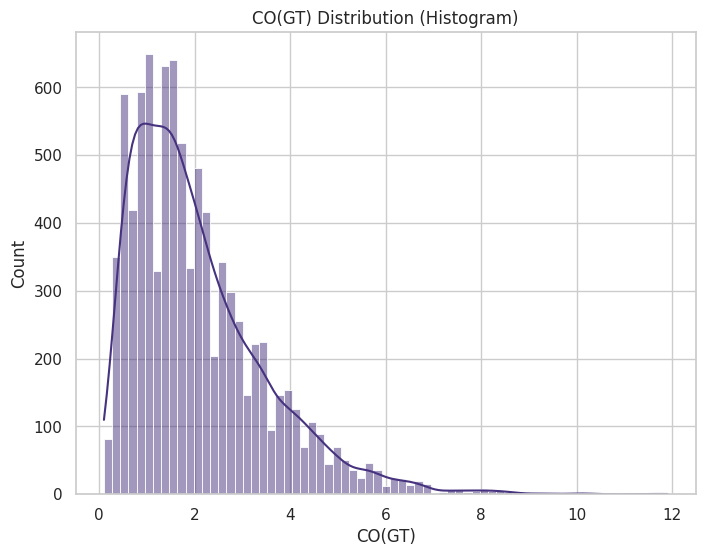

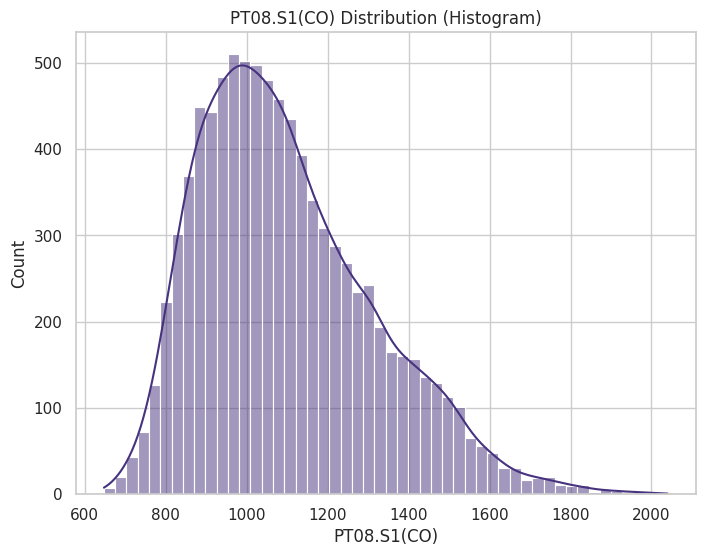

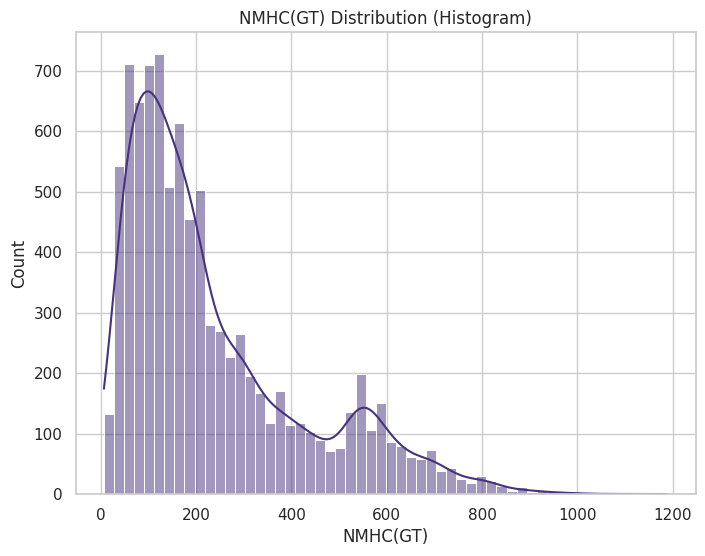

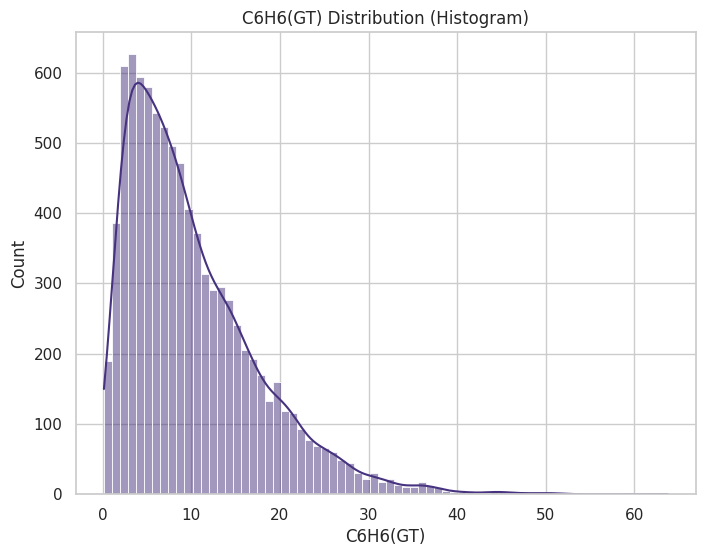

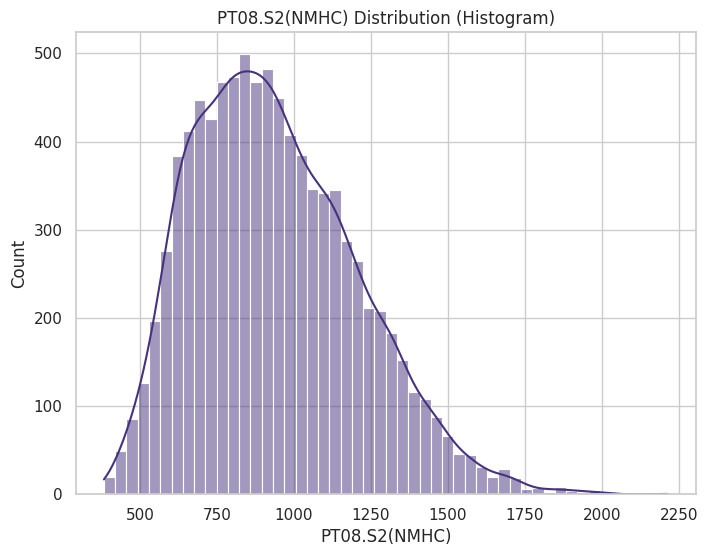

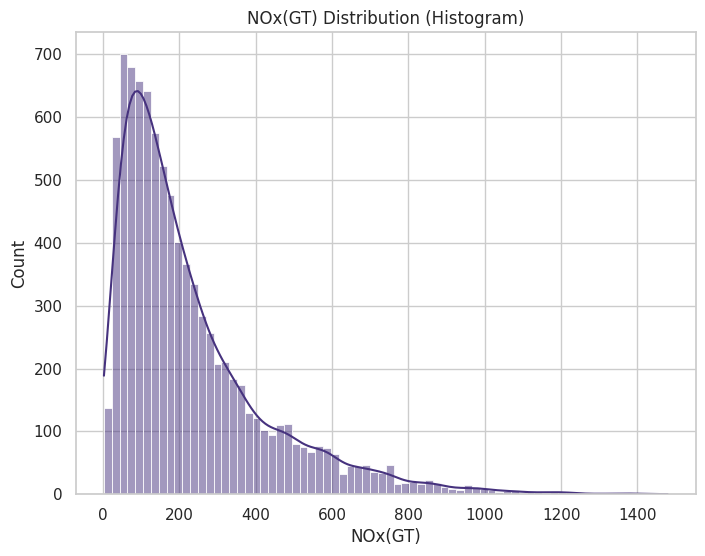

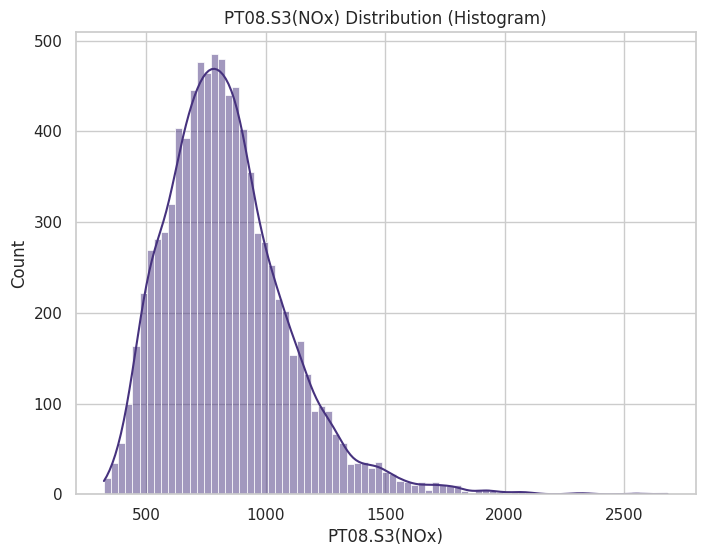

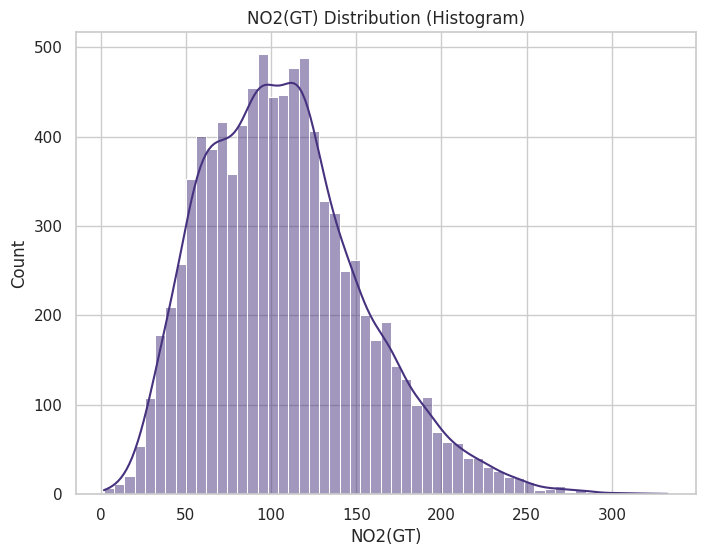

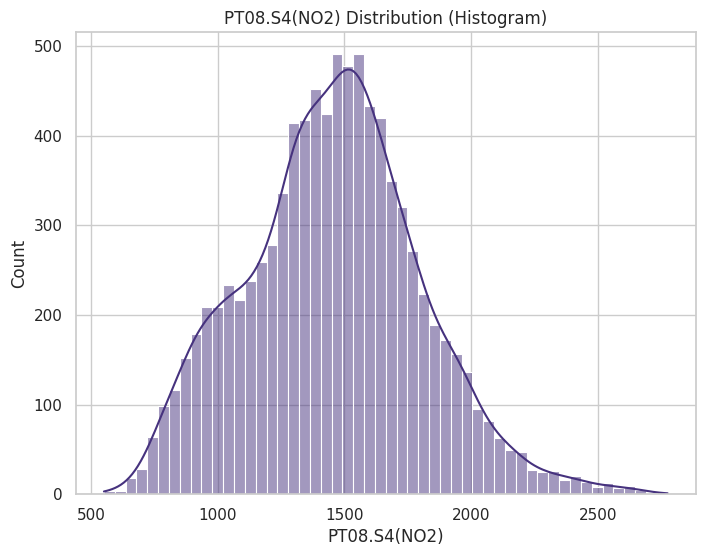

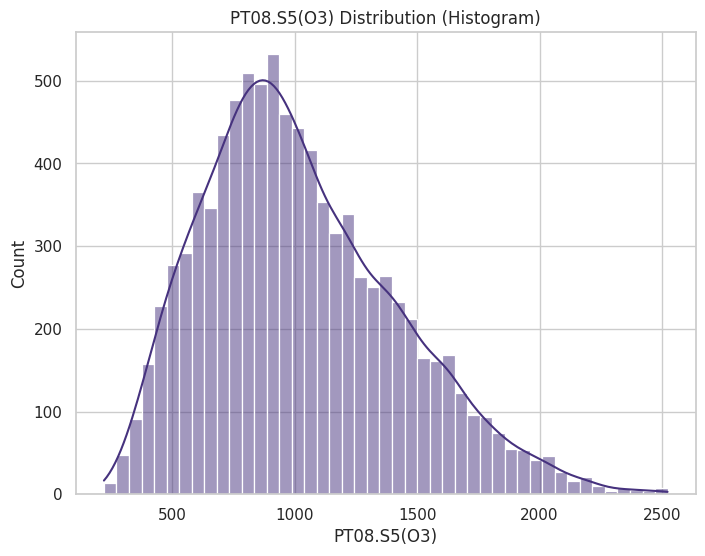

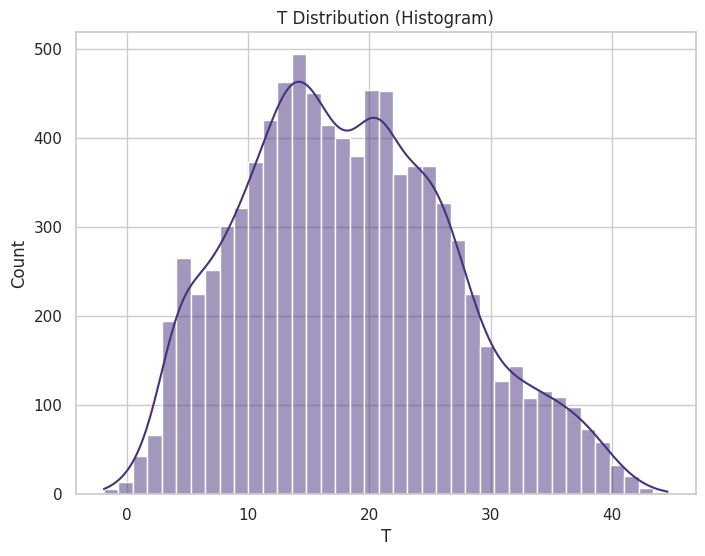

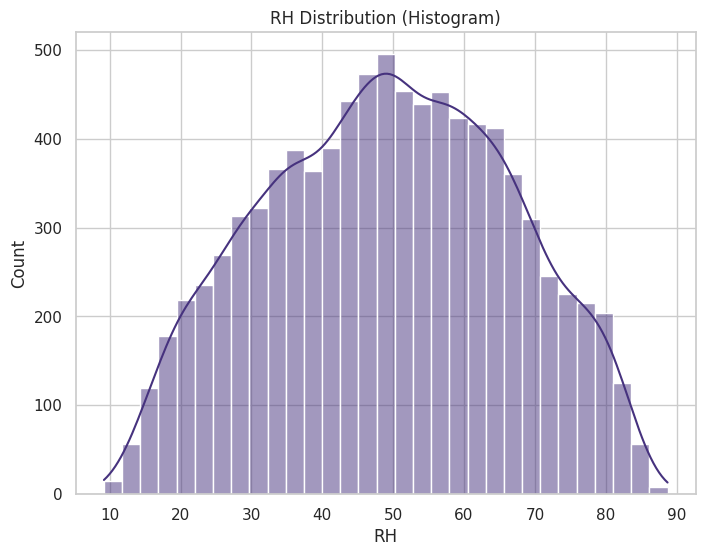

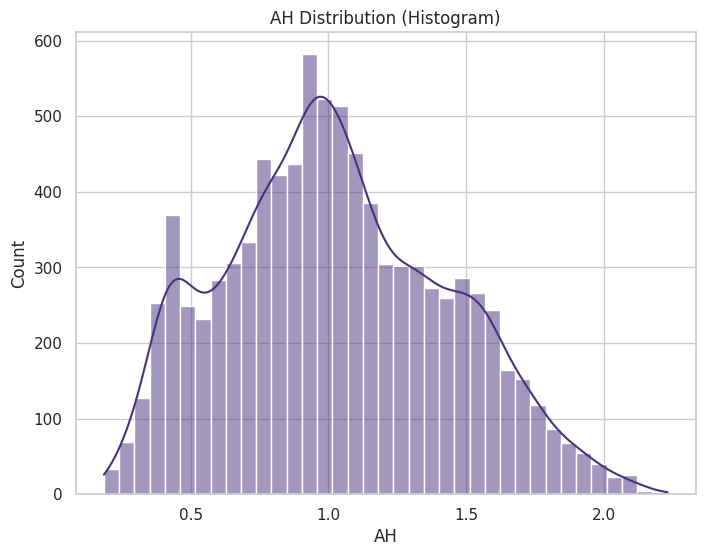

In [ ]:
numerical_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                     'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
                     'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution (Histogram)')

Above we can see all our numerical variables' distribution plots, they seem quite alright at the first glance, most of them have symmetric skew and some of them have a positive one, with mostly normal kutosis

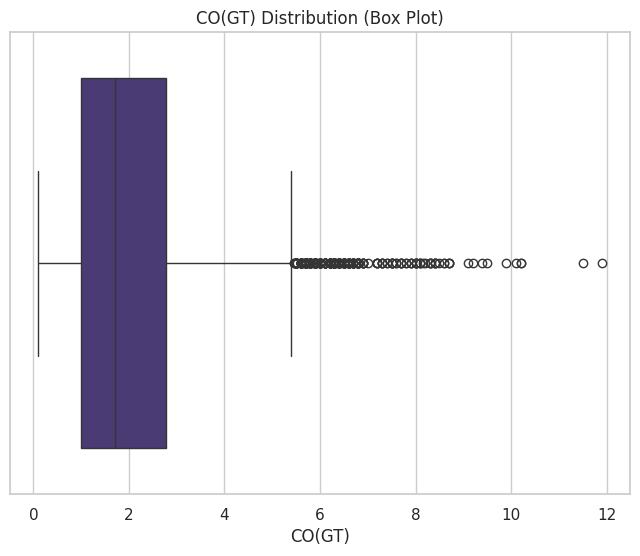

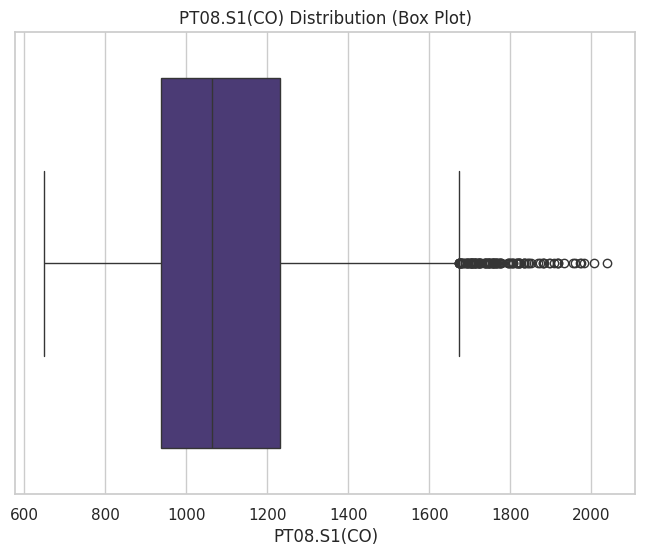

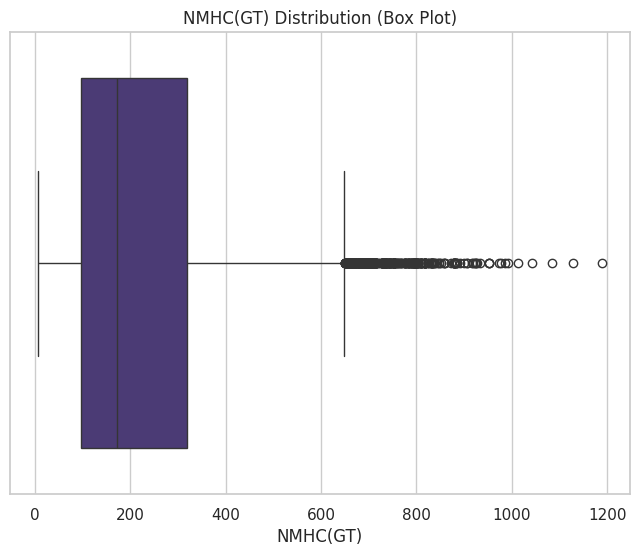

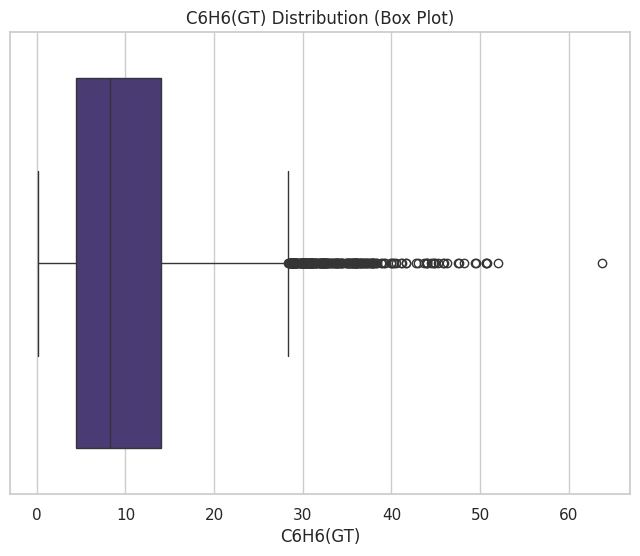

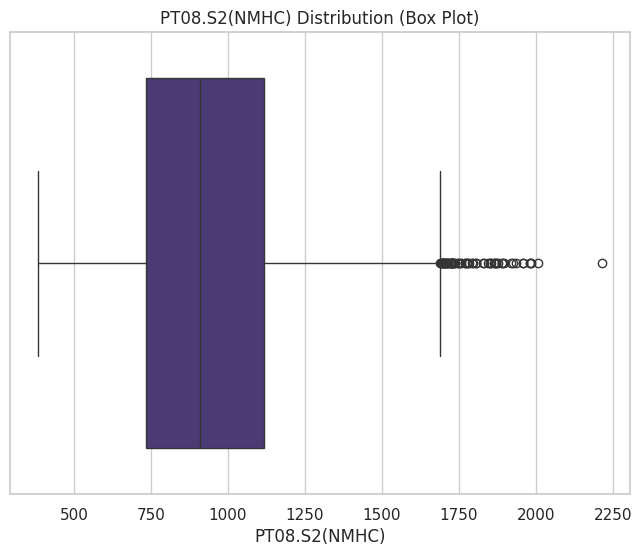

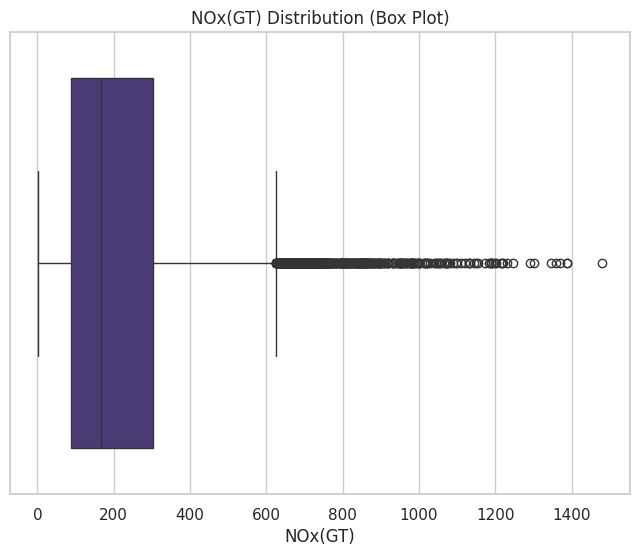

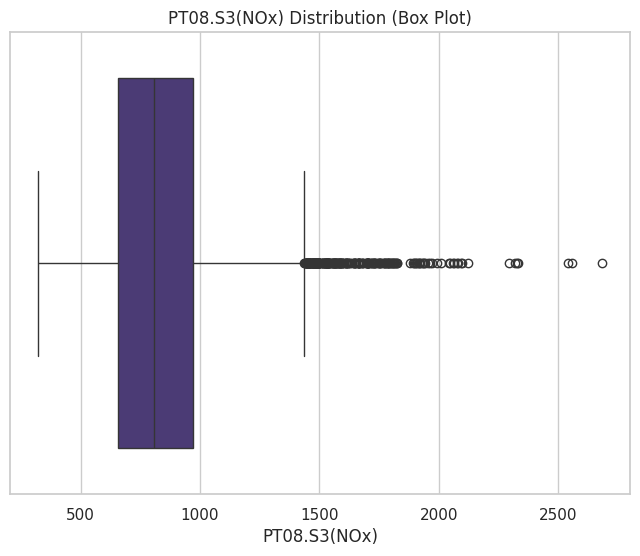

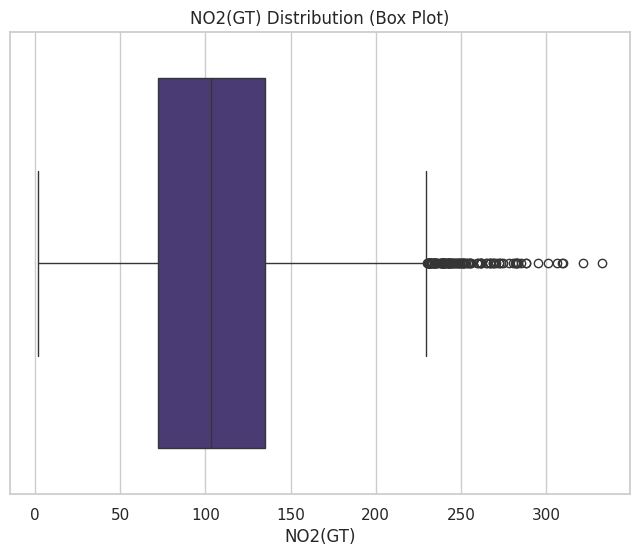

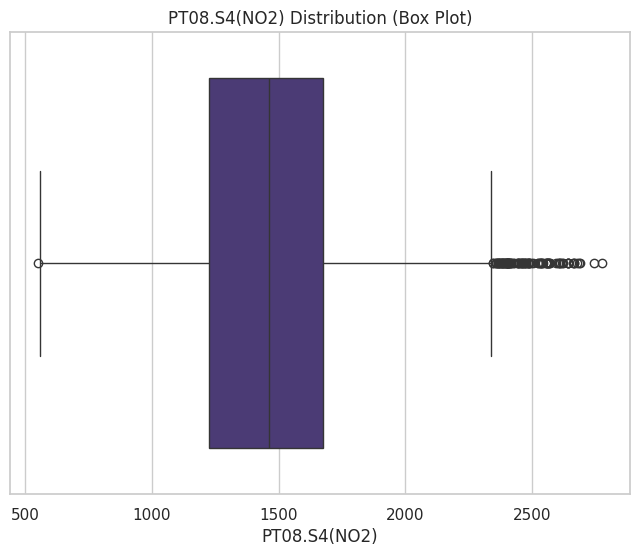

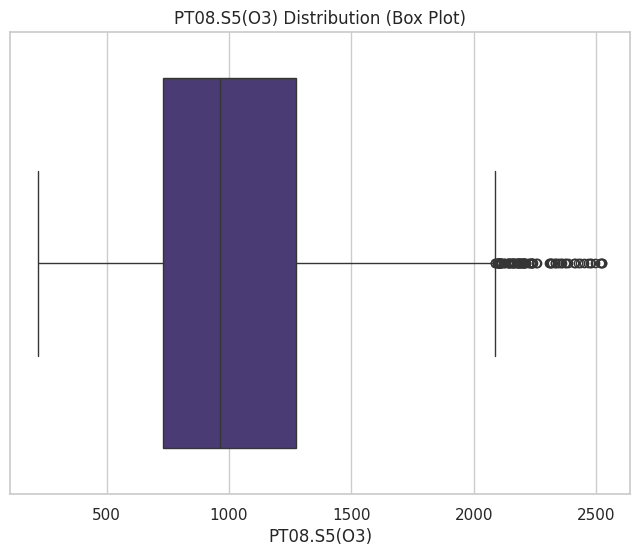

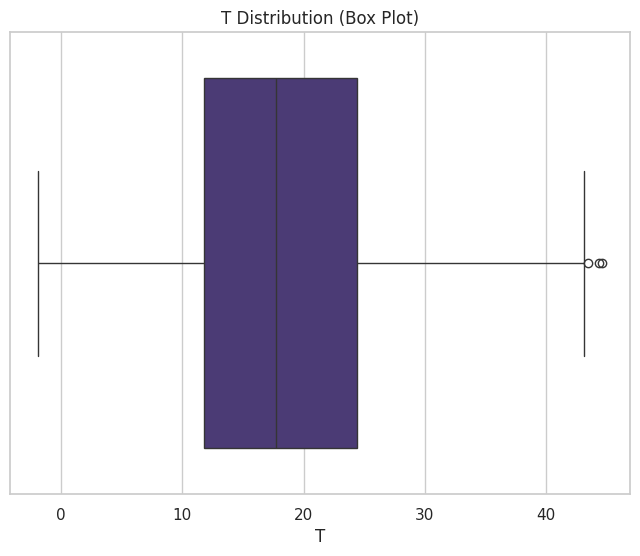

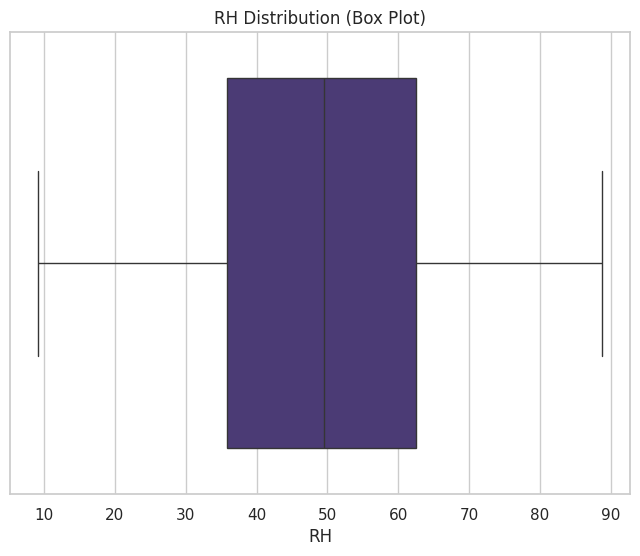

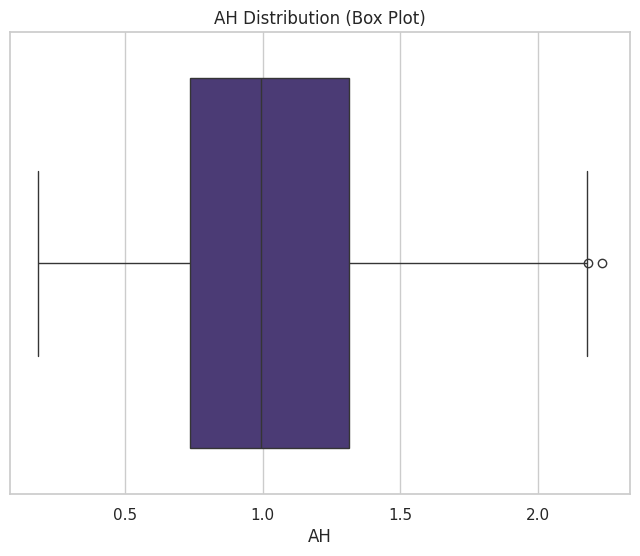

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'{col} Distribution (Box Plot)')
    plt.show()

What can we say based on the boxplots above, so we can't really say that any of them have any significant outliers, but we can actually see some of them have much lower interquartiles then few of the values, for example CO, NMHC, NOx, these variables have around 6 times higher outlier points than their median is

## **Multivariate Analysis**

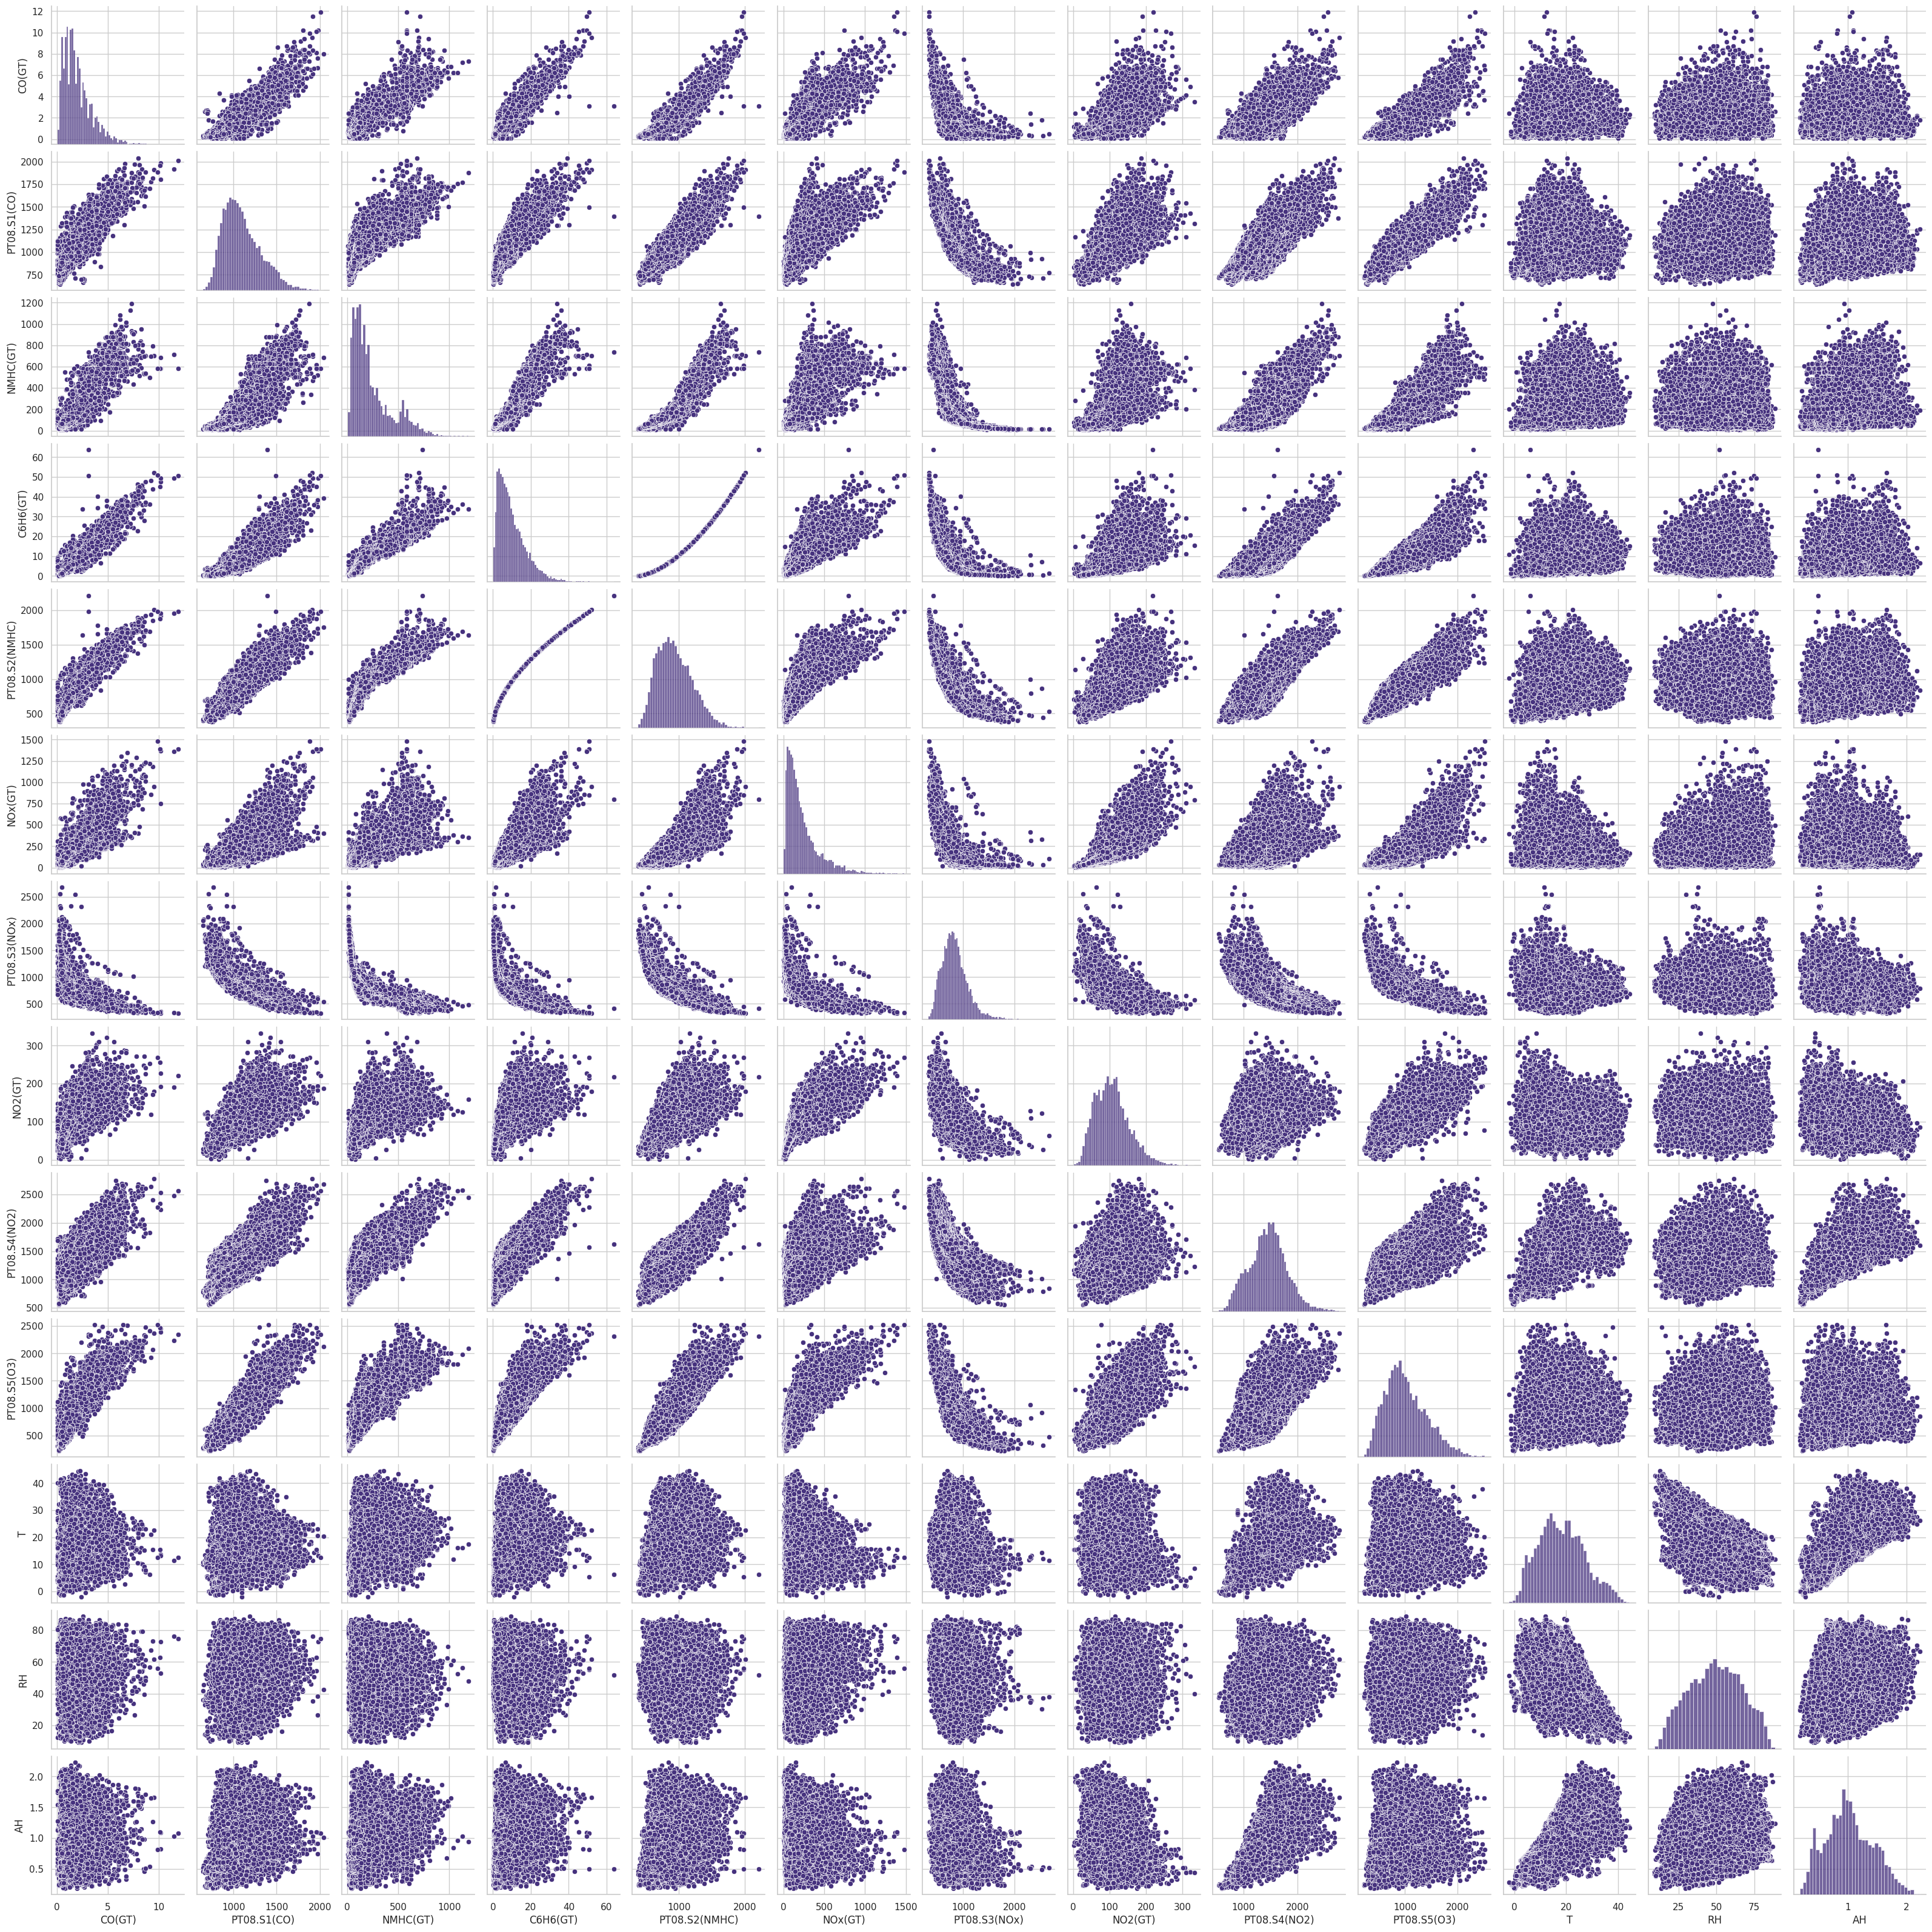

In [ ]:
df_numeric = df.drop(columns=['Date', 'Time'])

sns.pairplot(df_numeric)

There is much to talk about the pairplot above, first noticable thing that lots of the independent variables have high correlation, also not all of them seem to be linear, but they seem to be polynomial correlations, we should also emphasize that the following three variables: T, RH and AH, does not seem to have any kind of significant correlation with any other columns. Let's take closer look to our correlations, with corr matrix heatmap

<Axes: >

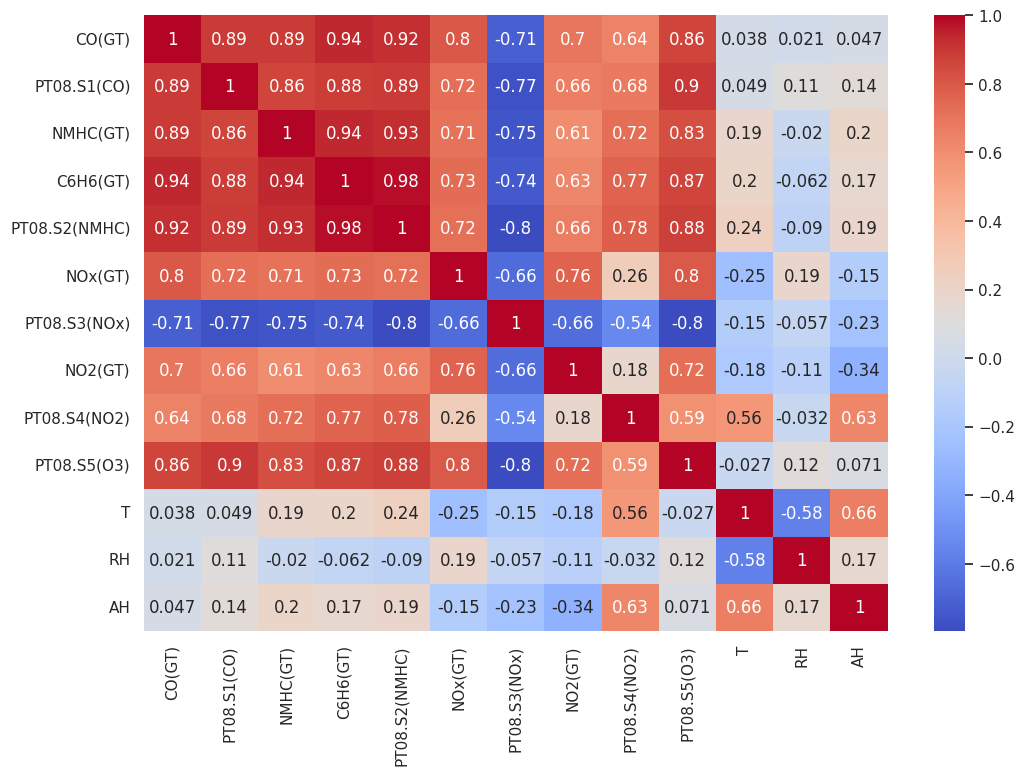

In [ ]:
corr = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

So as we already mentioned, there are lots of multicollinearity between multiple variables and also with the target column, which we can use and do some feature engineering with it soon

<ipython-input-19-e880b87fe618>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

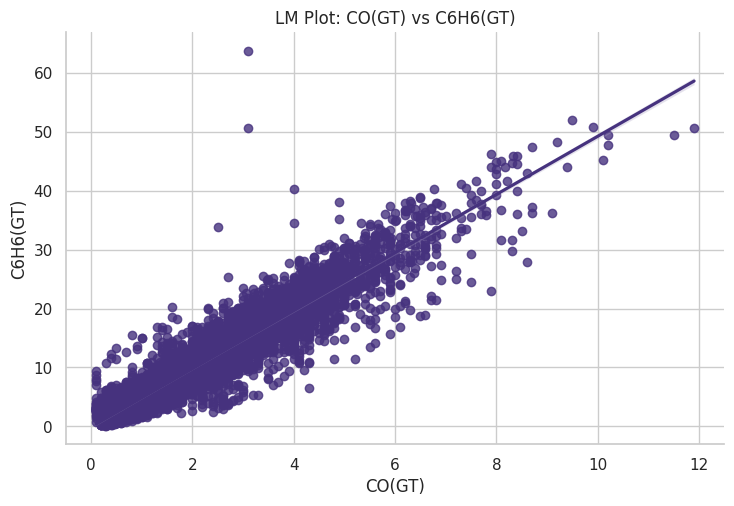

<Figure size 800x600 with 0 Axes>

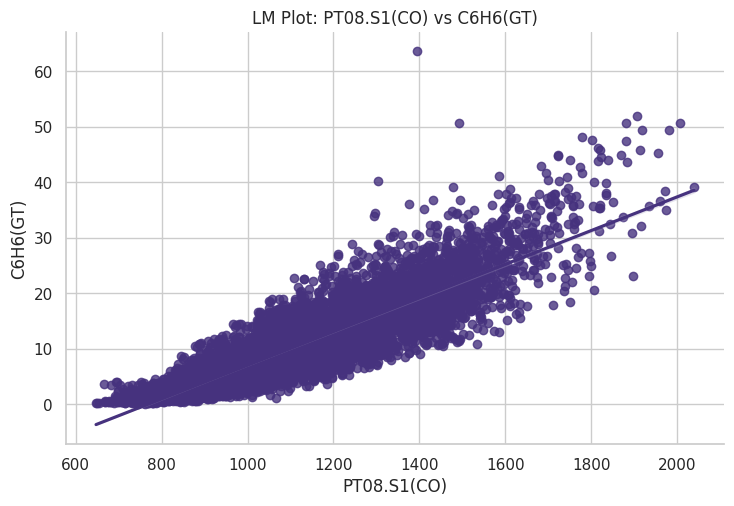

<Figure size 800x600 with 0 Axes>

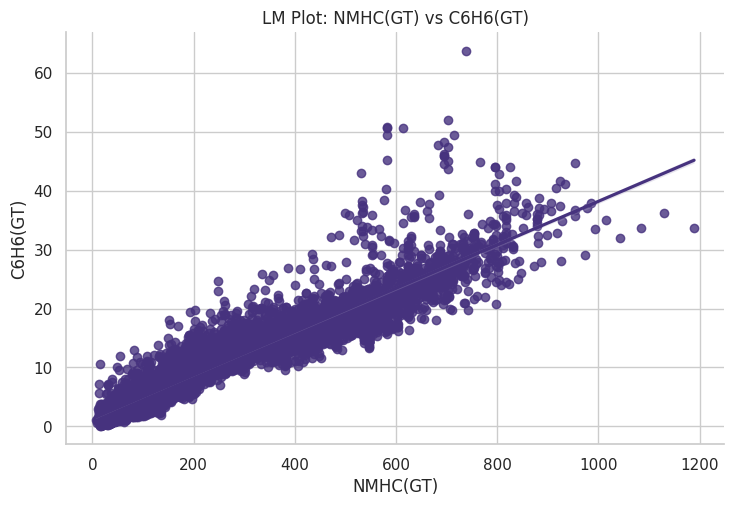

<Figure size 800x600 with 0 Axes>

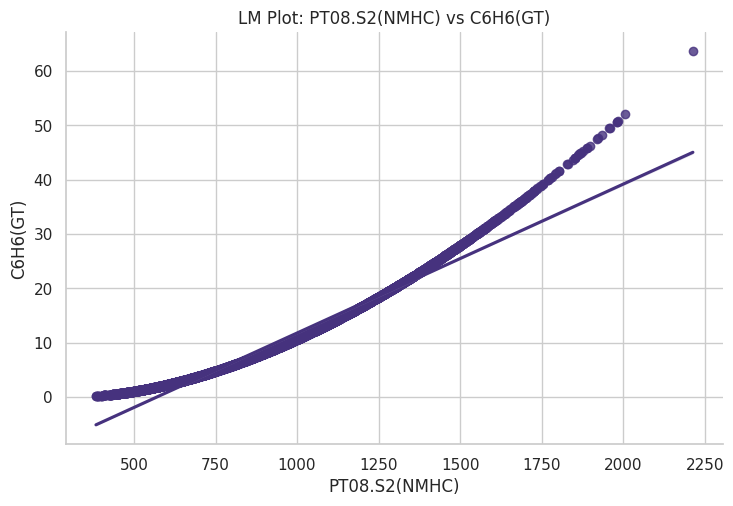

<Figure size 800x600 with 0 Axes>

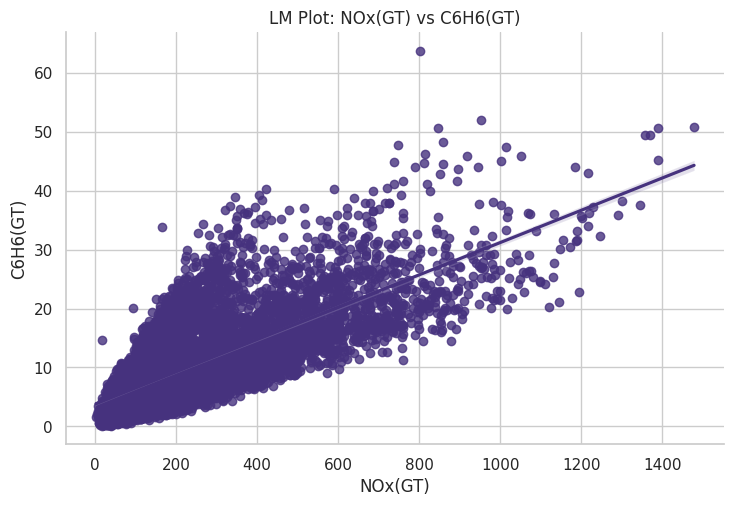

<Figure size 800x600 with 0 Axes>

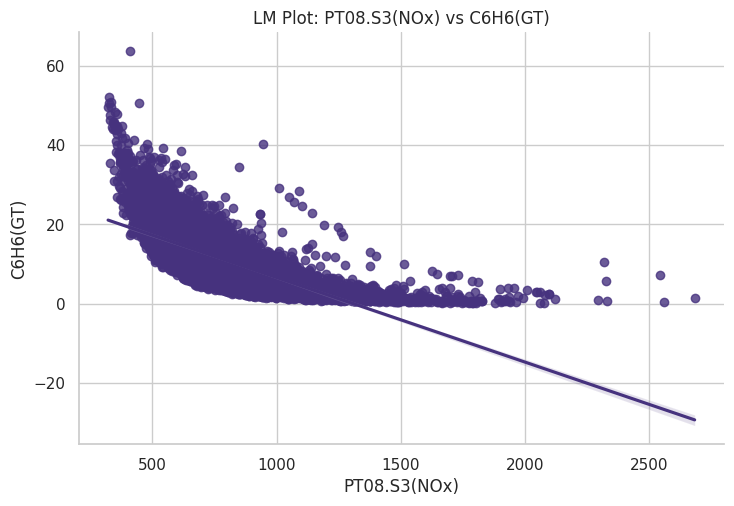

<Figure size 800x600 with 0 Axes>

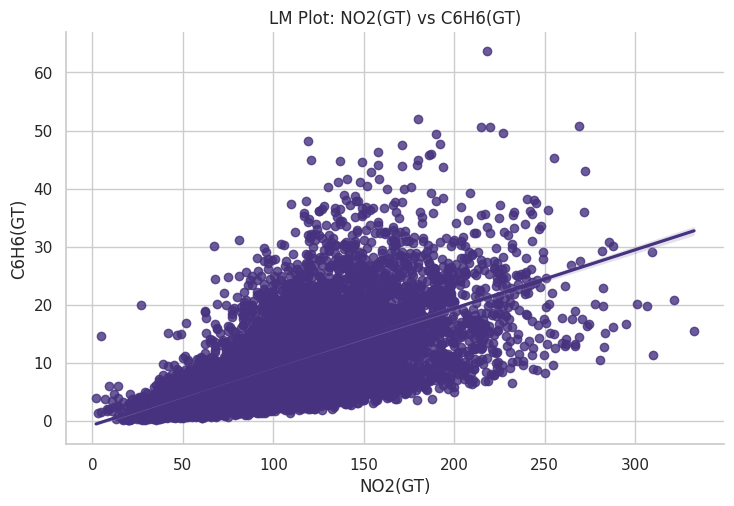

<Figure size 800x600 with 0 Axes>

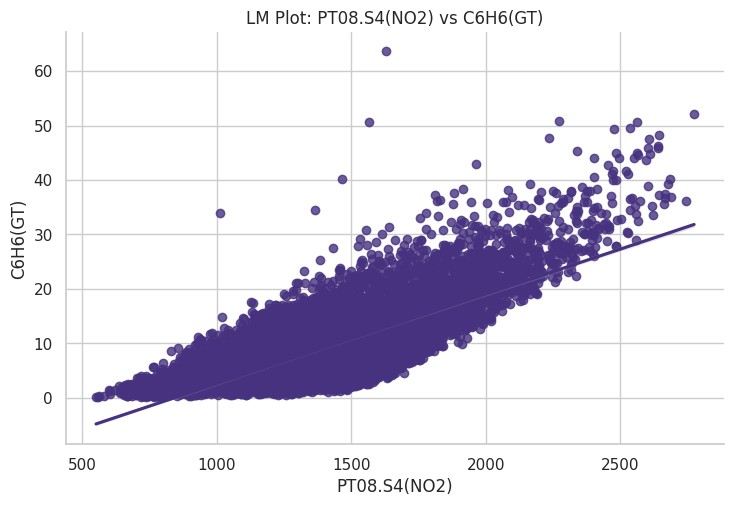

<Figure size 800x600 with 0 Axes>

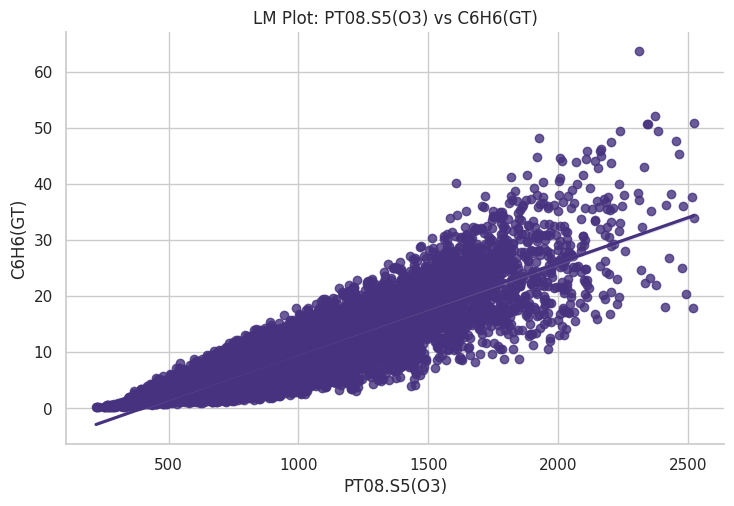

<Figure size 800x600 with 0 Axes>

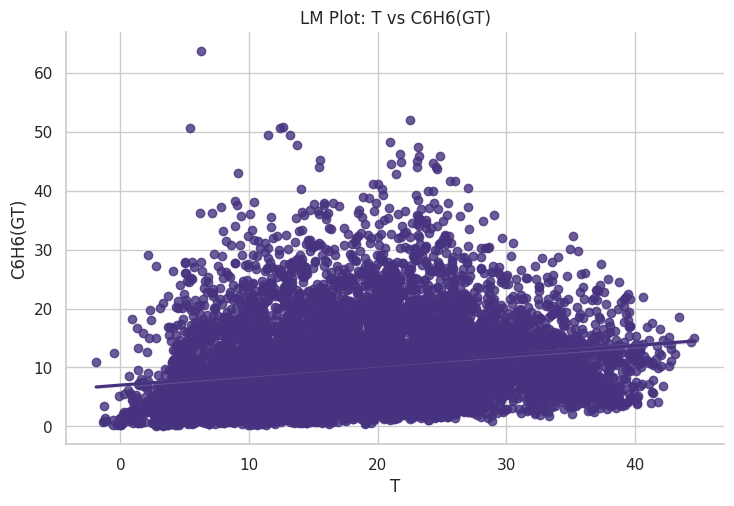

<Figure size 800x600 with 0 Axes>

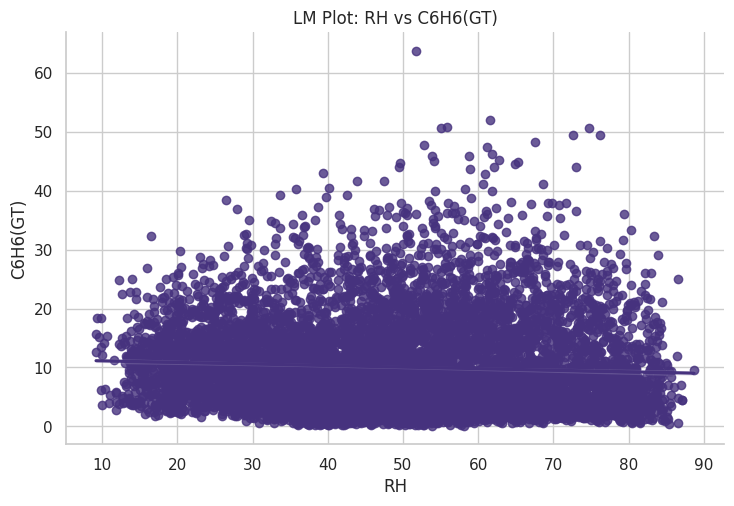

<Figure size 800x600 with 0 Axes>

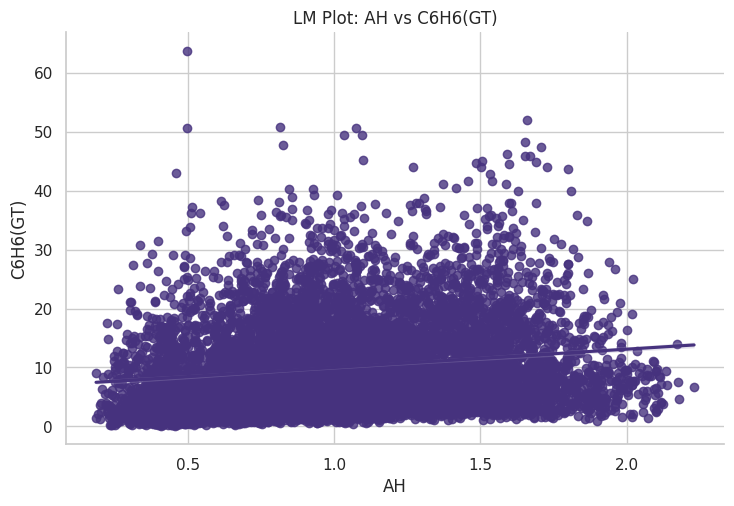

In [ ]:
numerical_Xs = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)',
                     'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
                     'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
for col in numerical_Xs:
    plt.figure(figsize=(8, 6))
    sns.lmplot(x=col, y='C6H6(GT)', data=df, aspect=1.5)
    plt.title(f'LM Plot: {col} vs C6H6(GT)')

So here we got closer look to our scatterplot correlations of all variables with our target, it gives us great ideas about out polynomiality and relationship between independent and dependent variables, that not all of them are linear

# **Data Scaling**

Let's scale our data. I will scale all of my independent variables, except Date and Time, because these 2 columns are insignificant and won't be used for our baseline model evaluation

In [ ]:
exclude_cols = ['Date', 'Time', 'C6H6(GT)']

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_cols)

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df.head().T

0                    1                    2  \
CO(GT)                    0.380033            -0.043757             0.097506   
PT08.S1(CO)               1.199102             0.886995             1.392586   
NMHC(GT)                 -0.458944             -0.65908            -0.785481   
C6H6(GT)                 11.881723             9.397165             8.997817   
PT08.S2(NMHC)             0.399045              0.05892             0.000828   
NOx(GT)                   -0.31778            -0.634129             -0.49353   
PT08.S3(NOx)              0.860118             1.317671             1.186246   
NO2(GT)                   0.116771             -0.33319             0.138198   
PT08.S4(NO2)              0.681301             0.296392             0.284115   
PT08.S5(O3)               0.614165            -0.126815             0.128543   
T                         -0.53395            -0.567915            -0.726423   
RH                       -0.020638            -0.088497             0.273897   
AH                       -0.663157            -0.743065            -0.681767   
Date           2004-03-10 00:00:00  2004-03-10 00:00:00  2004-03-10 00:00:00   
Time                      18:00:00             19:00:00             20:00:00   

                                 3                    4  
CO(GT)                    0.097506            -0.326283  
PT08.S1(CO)               1.270507              0.79486  
NMHC(GT)                 -0.827615            -0.980349  
C6H6(GT)                  9.228796             6.518224  
PT08.S2(NMHC)             0.034559             -0.38802  
NOx(GT)                  -0.287652             -0.49353  
PT08.S3(NOx)              0.999331             1.439361  
NO2(GT)                   0.309612             0.181051  
PT08.S4(NO2)              0.368608             0.097799  
PT08.S5(O3)               0.452918             0.218892  
T                         -0.82832            -0.811337  
RH                        0.621852             0.597308  
AH                        -0.59144            -0.586284  
Date           2004-03-10 00:00:00  2004-03-10 00:00:00  
Time                      21:00:00             22:00:00

# **Feature Engineering**

So, during our multivariate analysis, we mentioned and noticed that some of our variables had non-linear relationships with the target value, so we use it as our advantage and make polynomial features for better line fit. Following variables had the most noticable polynomial correlations based on scatterplots

In [ ]:
quad_cols = ['PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)']

for col in quad_cols:
    df[f'{col}_squared'] = df[col] ** 2

In [ ]:
df.head().T

0                    1  \
CO(GT)                            0.380033            -0.043757   
PT08.S1(CO)                       1.199102             0.886995   
NMHC(GT)                         -0.458944             -0.65908   
C6H6(GT)                         11.881723             9.397165   
PT08.S2(NMHC)                     0.399045              0.05892   
NOx(GT)                           -0.31778            -0.634129   
PT08.S3(NOx)                      0.860118             1.317671   
NO2(GT)                           0.116771             -0.33319   
PT08.S4(NO2)                      0.681301             0.296392   
PT08.S5(O3)                       0.614165            -0.126815   
T                                 -0.53395            -0.567915   
RH                               -0.020638            -0.088497   
AH                               -0.663157            -0.743065   
Date                   2004-03-10 00:00:00  2004-03-10 00:00:00   
Time                              18:00:00             19:00:00   
PT08.S2(NMHC)_squared             0.159237             0.003472   
PT08.S3(NOx)_squared              0.739803             1.736257   
PT08.S4(NO2)_squared              0.464172             0.087848   

                                         2                    3  \
CO(GT)                            0.097506             0.097506   
PT08.S1(CO)                       1.392586             1.270507   
NMHC(GT)                         -0.785481            -0.827615   
C6H6(GT)                          8.997817             9.228796   
PT08.S2(NMHC)                     0.000828             0.034559   
NOx(GT)                           -0.49353            -0.287652   
PT08.S3(NOx)                      1.186246             0.999331   
NO2(GT)                           0.138198             0.309612   
PT08.S4(NO2)                      0.284115             0.368608   
PT08.S5(O3)                       0.128543             0.452918   
T                                -0.726423             -0.82832   
RH                                0.273897             0.621852   
AH                               -0.681767             -0.59144   
Date                   2004-03-10 00:00:00  2004-03-10 00:00:00   
Time                              20:00:00             21:00:00   
PT08.S2(NMHC)_squared             0.000001             0.001194   
PT08.S3(NOx)_squared               1.40718             0.998662   
PT08.S4(NO2)_squared              0.080721             0.135872   

                                         4  
CO(GT)                           -0.326283  
PT08.S1(CO)                        0.79486  
NMHC(GT)                         -0.980349  
C6H6(GT)                          6.518224  
PT08.S2(NMHC)                     -0.38802  
NOx(GT)                           -0.49353  
PT08.S3(NOx)                      1.439361  
NO2(GT)                           0.181051  
PT08.S4(NO2)                      0.097799  
PT08.S5(O3)                       0.218892  
T                                -0.811337  
RH                                0.597308  
AH                               -0.586284  
Date                   2004-03-10 00:00:00  
Time                              22:00:00  
PT08.S2(NMHC)_squared             0.150559  
PT08.S3(NOx)_squared              2.071759  
PT08.S4(NO2)_squared              0.009565

So, besides polynomiality, I did a reasearch about the column descriptions and real life air quality biological terms. According to the internet, most related and most interactable columns are PT08.S2(NMHC), PT08.S4(NO2), CO(GT), PT08.S2(NMHC). And If we make their interactive terms they will actually help the model to make a better predictions

In [ ]:
df['PT08.S2(NMHC)_PT08.S4(NO2)'] = df['PT08.S2(NMHC)'] * df['PT08.S4(NO2)']
df['CO(GT)_PT08.S2(NMHC)'] = df['CO(GT)'] * df['PT08.S2(NMHC)']

In [ ]:
df.head().T

0                    1  \
CO(GT)                                 0.380033            -0.043757   
PT08.S1(CO)                            1.199102             0.886995   
NMHC(GT)                              -0.458944             -0.65908   
C6H6(GT)                              11.881723             9.397165   
PT08.S2(NMHC)                          0.399045              0.05892   
NOx(GT)                                -0.31778            -0.634129   
PT08.S3(NOx)                           0.860118             1.317671   
NO2(GT)                                0.116771             -0.33319   
PT08.S4(NO2)                           0.681301             0.296392   
PT08.S5(O3)                            0.614165            -0.126815   
T                                      -0.53395            -0.567915   
RH                                    -0.020638            -0.088497   
AH                                    -0.663157            -0.743065   
Date                        2004-03-10 00:00:00  2004-03-10 00:00:00   
Time                                   18:00:00             19:00:00   
PT08.S2(NMHC)_squared                  0.159237             0.003472   
PT08.S3(NOx)_squared                   0.739803             1.736257   
PT08.S4(NO2)_squared                   0.464172             0.087848   
PT08.S2(NMHC)_PT08.S4(NO2)              0.27187             0.017464   
CO(GT)_PT08.S2(NMHC)                    0.15165            -0.002578   

                                              2                    3  \
CO(GT)                                 0.097506             0.097506   
PT08.S1(CO)                            1.392586             1.270507   
NMHC(GT)                              -0.785481            -0.827615   
C6H6(GT)                               8.997817             9.228796   
PT08.S2(NMHC)                          0.000828             0.034559   
NOx(GT)                                -0.49353            -0.287652   
PT08.S3(NOx)                           1.186246             0.999331   
NO2(GT)                                0.138198             0.309612   
PT08.S4(NO2)                           0.284115             0.368608   
PT08.S5(O3)                            0.128543             0.452918   
T                                     -0.726423             -0.82832   
RH                                     0.273897             0.621852   
AH                                    -0.681767             -0.59144   
Date                        2004-03-10 00:00:00  2004-03-10 00:00:00   
Time                                   20:00:00             21:00:00   
PT08.S2(NMHC)_squared                  0.000001             0.001194   
PT08.S3(NOx)_squared                    1.40718             0.998662   
PT08.S4(NO2)_squared                   0.080721             0.135872   
PT08.S2(NMHC)_PT08.S4(NO2)             0.000235             0.012739   
CO(GT)_PT08.S2(NMHC)                   0.000081              0.00337   

                                              4  
CO(GT)                                -0.326283  
PT08.S1(CO)                             0.79486  
NMHC(GT)                              -0.980349  
C6H6(GT)                               6.518224  
PT08.S2(NMHC)                          -0.38802  
NOx(GT)                                -0.49353  
PT08.S3(NOx)                           1.439361  
NO2(GT)                                0.181051  
PT08.S4(NO2)                           0.097799  
PT08.S5(O3)                            0.218892  
T                                     -0.811337  
RH                                     0.597308  
AH                                    -0.586284  
Date                        2004-03-10 00:00:00  
Time                                   22:00:00  
PT08.S2(NMHC)_squared                  0.150559  
PT08.S3(NOx)_squared                   2.071759  
PT08.S4(NO2)_squared                   0.009565  
PT08.S2(NMHC)_PT08.S4(NO2)            -0.037948  
CO(GT)_PT08.S2(NMHC)

# **Model Building**

Let's build our linearregression model

In [ ]:
X = df.drop(columns=['Date', 'Time', 'C6H6(GT)'])

y = df['C6H6(GT)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.002650351793816391
R-squared: 0.9999533172000119
Mean Absolute Error: 0.03580171466095845
Root Mean Squared Error: 0.05148156751514459


we got our model trained and after testing it on test data we get quite amazing results, having really low MSE and MAE with almost 1 R squared, which means that we have generalized model (because we tested our model, build on the other part of data) with amazing fit and precise predictions

Text(0.5, 1.0, 'Residual Plot')

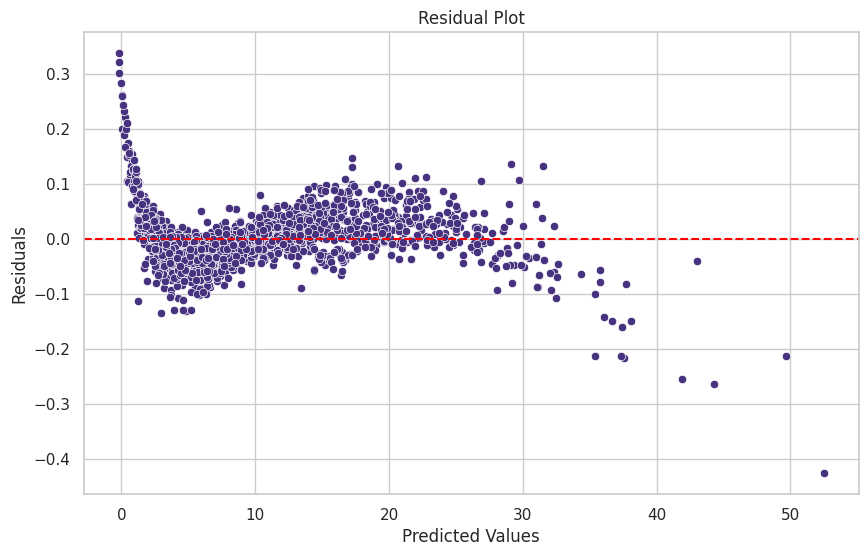

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

Here is our residuals, which seem amazing, because the graph is quite shrunk around the line so we dont have any high residuals

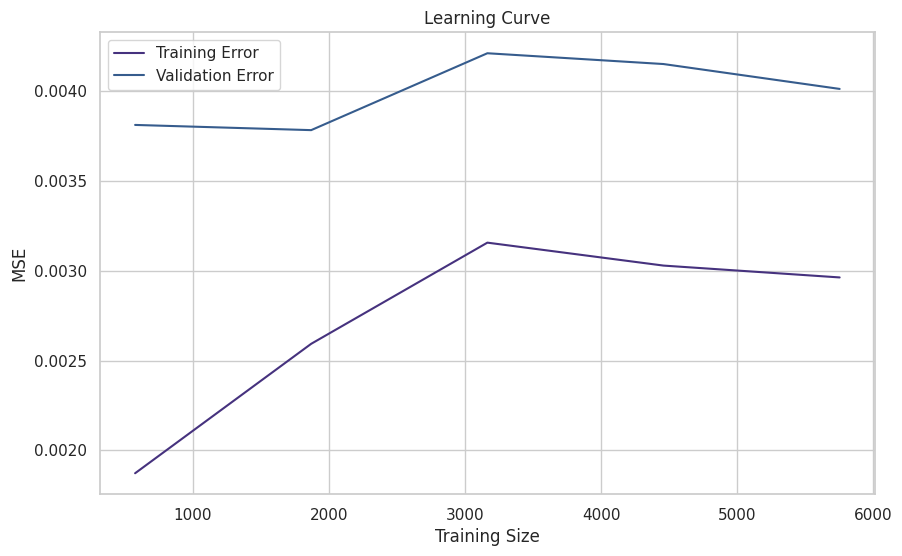

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training Error')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation Error')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()

Here is the learning curve, depicting that training and validation data error changes as the training size increases

# **Hyperparameter Tuning**

I decided to use Ridge (L2) regularization because all features are potentially important, and I don't want to shrink any coefficients to exactly zero. Also because we noticed a significanty multicollinearity, and Ridge is a good practice for such kind of data

In [ ]:
ridge = Ridge()
param_grid = {'alpha':np.logspace(-3,3,50)}

ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

best_alpha = ridge_cv.best_params_['alpha']
best_ridge_model = ridge_cv.best_estimator_

print(f"Best alpha: {best_alpha}")

Best alpha: 0.868511373751352


In [ ]:
y_pred = best_ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.0027287627619847544
R-squared: 0.9999519360839079
Mean Absolute Error: 0.036664163766951044
Root Mean Squared Error: 0.05223756083494667


And after we tuned our alpha, we got even better results, our MSE is significantly lower and R squared a little bit higher as well, which means nothing but good results

Text(0.5, 1.0, 'Feature Importance based on Ridge Regression Coefficients')

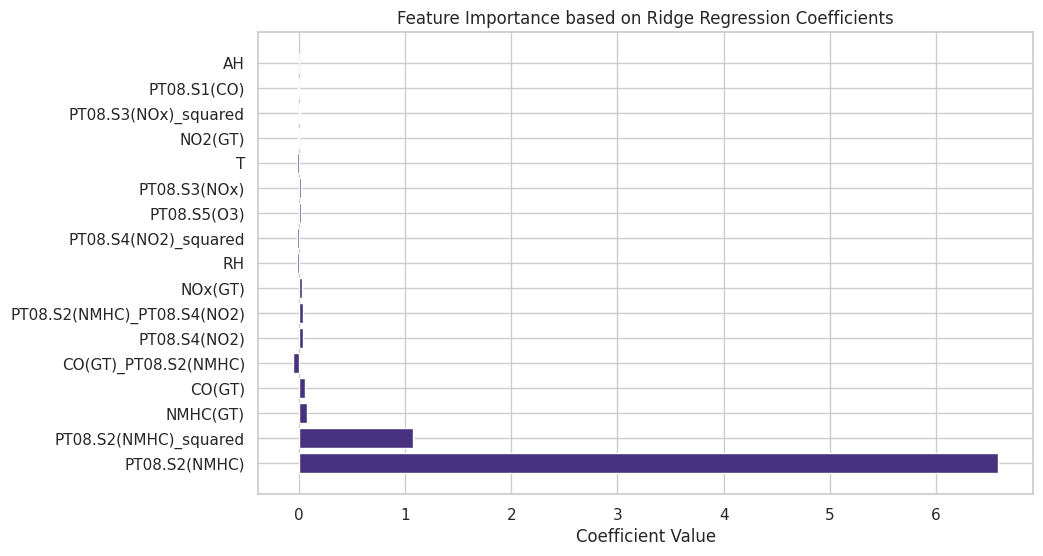

In [ ]:
coefficients = best_ridge_model.coef_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].apply(np.abs)
feature_importance_sorted = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Ridge Regression Coefficients')

So here is our graph of Importances of features after our Ridge regularization. It seems like PT08.S2 is far more important and change maker variable for our outcome than the others with coefficinet value over 6. The second one, not really low like others, is the same variable but squared, which also means the significancy of PT08.S2, and others have more or less insignificant influence on our target variable